In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

In [2]:
def create_driver(executable_path='/Applications/Chdriver/chromedriver'):
    chrome_options = Options()
    service = Service(executable_path=executable_path)
    return webdriver.Chrome(service=service)

In [3]:
match_df = pd.read_csv('data.csv')
match_df

,Name,Date,Team,Runs,Balls,Fours,Sixes,SR,Over,Given,Wickets,M,W,NB,Economy,Country,Born
0,Saif Hassan,2024-02-14,DRD,2,4,0,0,50.00,0.0,0,0,0,0,0,0.00,Bangladesh,1998-10-30
1,Jaker Ali,2024-02-14,CV,40,31,2,3,129.03,0.0,0,0,0,0,0,0.00,Bangladesh,0
2,Will Jacks,2024-02-14,CV,18,10,1,2,180.00,0.0,0,0,0,0,0,0.00,England,1998-11-21
3,Litton Das,2024-02-14,CV,2,3,0,0,66.67,0.0,0,0,0,0,0,0.00,Bangladesh,1994-10-13
4,Mukidul Islam,2024-02-14,KT,4,1,1,0,400.00,2.0,28,1,0,1,0,14.00,Bangladesh,2000-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134411,Dale Steyn,2010-05-19,SA,0,0,0,0,0.00,4.0,23,0,0,7,1,5.75,South Africa,1983-06-27
134412,Charl Langeveldt,2010-05-19,SA,0,0,0,0,0.00,3.0,31,1,0,0,0,10.33,South Africa,1974-12-17
134413,Daren Sammy,2010-05-19,WI,17,28,1,0,60.71,2.0,11,0,0,0,0,5.50,West Indies,1983-12-20
134414,Graeme Smith,2010-05-19,SA,37,31,3,1,119.35,0.0,0,0,0,0,0,0.00,South Africa,1981-02-01


In [4]:
url = 'https://www.espncricinfo.com/series/pakistan-super-league-2023-24-1412744/lahore-qalandars-vs-quetta-gladiators-4th-match-1416475/match-playing-xi'

driver = create_driver()
driver.get(url)

player_links = []
player_table = driver.find_element(By.XPATH, '//*[@id="main-container"]/div[5]/div[1]/div/div[3]/div[1]/div[2]/div/table/tbody')
player_elements = player_table.find_elements(By.CSS_SELECTOR, 'a.ds-inline-flex.ds-items-start.ds-leading-none')
for element in player_elements[:22]:
    link = element.get_attribute('href')
    player_links.append(link)
driver.quit()

player_links

['https://www.espncricinfo.com/cricketers/sahibzada-farhan-647785',
 'https://www.espncricinfo.com/cricketers/jason-roy-298438',
 'https://www.espncricinfo.com/cricketers/fakhar-zaman-512191',
 'https://www.espncricinfo.com/cricketers/saud-shakeel-652687',
 'https://www.espncricinfo.com/cricketers/rassie-van-der-dussen-337790',
 'https://www.espncricinfo.com/cricketers/khawaja-nafay-1329699',
 'https://www.espncricinfo.com/cricketers/abdullah-shafique-922941',
 'https://www.espncricinfo.com/cricketers/rilee-rossouw-318845',
 'https://www.espncricinfo.com/cricketers/sikandar-raza-299572',
 'https://www.espncricinfo.com/cricketers/sarfaraz-ahmed-227760',
 'https://www.espncricinfo.com/cricketers/salman-fayyaz-959787',
 'https://www.espncricinfo.com/cricketers/sherfane-rutherford-914541',
 'https://www.espncricinfo.com/cricketers/carlos-brathwaite-457249',
 'https://www.espncricinfo.com/cricketers/akeal-hosein-530812',
 'https://www.espncricinfo.com/cricketers/jahandad-khan-1402359',
 'ht

In [4]:
player_df = pd.read_csv('player_data.csv')
player_df

,Link,Name,Country,Born
0,https://www.espncricinfo.com/cricketers/matthe...,Matthew Short,Australia,1995-11-08
1,https://www.espncricinfo.com/cricketers/travis...,Travis Head,Australia,1993-12-29
2,https://www.espncricinfo.com/cricketers/mitche...,Mitchell Marsh,Australia,1991-10-20
3,https://www.espncricinfo.com/cricketers/josh-i...,Josh Inglis,Australia,1995-03-04
4,https://www.espncricinfo.com/cricketers/marcus...,Marcus Stoinis,Australia,1989-08-16
...,...,...,...,...
4970,https://www.espncricinfo.com/cricketers/ashok-...,Ashok Thakur,India,1977-04-10
4971,https://www.espncricinfo.com/cricketers/rajind...,Rajinder Thakur,India,1978-11-28
4972,https://www.espncricinfo.com/cricketers/ryan-s...,Ryan Sidebottom,England,1978-01-15
4973,https://www.espncricinfo.com/cricketers/dinesh...,Dinesh Daminda,Sri Lanka,1983-10-23


In [5]:
# link_df = pd.DataFrame(player_links, columns=['Link'])
# players = pd.merge(link_df, player_df, on='Link', how='inner')
# names = players[['Name']]
# names

player_data = [
    'Muhammad Rizwan', 'Dawid Malan', 'Reeza Hendricks', 'Yasir Khan', 
    'Iftikhar Ahmed', 'Khushdil Shah', 'David Willey', 'Usama Mir', 
    'Abbas Afridi', 'Muhammad Ali', 'Olly Stone', 'Alex Hales', 'Colin Munro', 
    'Salman Ali Agha', 'Shadab Khan', 'Azam Khan', 'Jordan Cox', 'Imad Wasim', 
    'Faheem Ashraf', 'Naseem Shah', 'Ubaid Shah', 'Tymal Mills'
]

names = pd.DataFrame(player_data, columns=['Name'])
names

,Name
0,Muhammad Rizwan
1,Dawid Malan
2,Reeza Hendricks
3,Yasir Khan
4,Iftikhar Ahmed
5,Khushdil Shah
6,David Willey
7,Usama Mir
8,Abbas Afridi
9,Muhammad Ali


In [6]:
df = pd.merge(names, match_df, on='Name', how='inner')
df

,Name,Date,Team,Runs,Balls,Fours,Sixes,SR,Over,Given,Wickets,M,W,NB,Economy,Country,Born
0,Dawid Malan,2024-02-10,SEC,6,4,1,0,150.00,0.0,0,0,0,0,0,0.00,England,1987-09-03
1,Dawid Malan,2024-02-04,SEC,19,20,1,1,95.00,0.0,0,0,0,0,0,0.00,England,1987-09-03
2,Dawid Malan,2024-02-02,SEC,2,8,0,0,25.00,0.0,0,0,0,0,0,0.00,England,1987-09-03
3,Dawid Malan,2024-01-31,SEC,40,32,5,1,125.00,0.0,0,0,0,0,0,0.00,England,1987-09-03
4,Dawid Malan,2024-01-27,SEC,18,22,2,0,81.82,0.0,0,0,0,0,0,0.00,England,1987-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,Tymal Mills,2016-12-04,AUCK,0,0,0,0,0.00,3.0,27,1,0,3,0,9.00,England,1992-08-12
2792,Tymal Mills,2016-11-17,CHV,4,3,1,0,133.33,4.0,25,3,0,1,0,6.25,England,1992-08-12
2793,Tymal Mills,2016-11-09,CHV,5,3,1,0,166.67,3.0,30,1,0,1,1,10.00,England,1992-08-12
2794,Tymal Mills,2016-11-08,CHV,0,0,0,0,0.00,4.0,28,1,0,2,1,7.00,England,1992-08-12


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df_sorted = df.sort_values(by=['Name', 'Date'], ascending=[True, True])

df_sorted['Cum_Runs'] = df_sorted.groupby('Name')['Runs'].cumsum()
df_sorted['Cum_Dis'] = df_sorted.groupby('Name').cumcount() + 1

df_sorted['Cum_Avg'] = round(df_sorted['Cum_Runs'] / df_sorted['Cum_Dis'], 2)

cum_df = df_sorted[['Name', 'Date', 'Runs', 'Cum_Runs', 'Cum_Dis', 'Cum_Avg']]

# cum_df[cum_df['Name'] == 'Mohammad Rizwan']
cum_df

,Name,Date,Runs,Cum_Runs,Cum_Dis,Cum_Avg
888,Abbas Afridi,2021-03-03,0,0,1,0.00
889,Abbas Afridi,2021-03-03,0,0,2,0.00
886,Abbas Afridi,2021-06-14,0,0,3,0.00
887,Abbas Afridi,2021-06-14,0,0,4,0.00
882,Abbas Afridi,2021-06-15,27,27,5,5.40
...,...,...,...,...,...,...
283,Yasir Khan,2022-01-30,14,44,2,22.00
282,Yasir Khan,2022-02-17,35,79,3,26.33
281,Yasir Khan,2022-02-24,8,87,4,21.75
280,Yasir Khan,2023-03-02,14,101,5,20.20


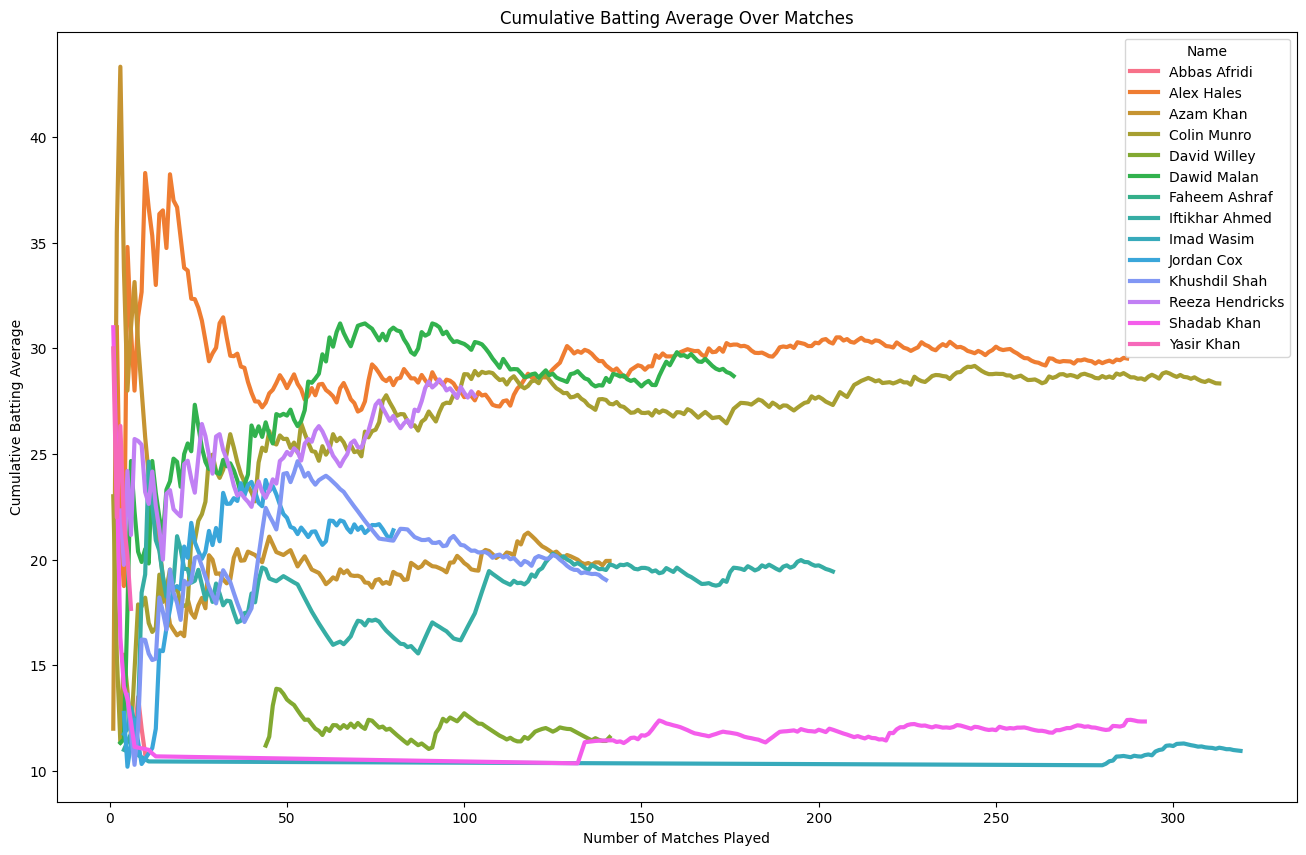

In [10]:
filtered_cum_df = cum_df[cum_df['Cum_Avg'] > 10]
plt.figure(figsize=(16, 10))

sns.lineplot(x='Cum_Dis', y='Cum_Avg', hue='Name', data=filtered_cum_df, style='Name', linewidth=3, dashes=False)

# Adding title and labels
plt.title('Cumulative Batting Average Over Matches')
plt.xlabel('Number of Matches Played')
plt.ylabel('Cumulative Batting Average')

plt.show()